## Variance_Covariance Matrix
- measures how much two random variables vary together.

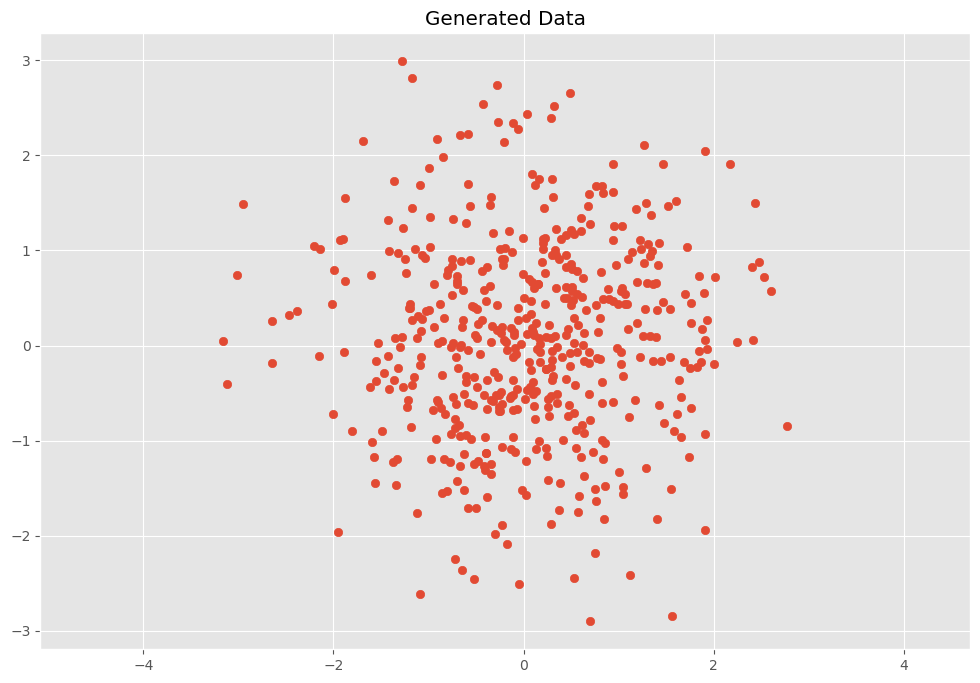

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

# Normal distributed x and y vector with mean 0 and standard deviation 1
x = np.random.normal(0, 1, 500)
y = np.random.normal(0, 1, 500)

#np,stack is like a zip() for x and y values in an array. 
X = np.vstack((x, y)).T

plt.scatter(X[:, 0], X[:, 1])
plt.title('Generated Data')
plt.axis('equal');


In [6]:
X

array([[-1.89679174e+00,  1.11975078e+00],
       [ 1.71451643e+00,  1.03808600e+00],
       [-5.62544341e-01,  1.46267691e+00],
       [ 4.96487516e-01,  1.21729535e+00],
       [-8.21953630e-01, -7.24136470e-01],
       [ 7.99495525e-01,  2.84126815e-01],
       [ 2.00011673e-01,  1.08057184e+00],
       [ 8.91290264e-01,  5.91445407e-01],
       [ 1.41556787e+00,  8.45998620e-01],
       [-2.20033945e+00,  1.04654512e+00],
       [ 3.45985766e-01, -6.00050526e-01],
       [ 6.94490318e-01, -2.90033063e+00],
       [ 8.22883570e-01,  1.67907375e+00],
       [-2.42278588e-01,  1.29309498e-01],
       [ 2.69599969e-01,  2.15468786e-01],
       [ 1.25422235e+00,  1.00447222e-01],
       [-9.91784422e-01,  1.86814677e+00],
       [ 8.60362759e-01, -1.02529667e+00],
       [ 1.86144380e+00, -1.77106745e-01],
       [-3.81479667e-01, -1.59105210e+00],
       [-1.13071950e-01,  2.34064175e+00],
       [-2.32158702e-01, -1.06316251e+00],
       [-2.38884804e+00,  3.61234319e-01],
       [ 3.

In [37]:
# Covariance
def cov(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)

# Covariance matrix
def cov_mat(X):
    return np.array([[cov(X[0], X[0]), cov(X[0], X[1])], \
                     [cov(X[1], X[0]), cov(X[1], X[1])]])

# Calculate covariance matrix 
np.cov(X.T) # (or with np.cov(X.T))

array([[1.0680756, 0.0239643],
       [0.0239643, 1.0667542]])

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(X)

PCA(n_components=2)

In [43]:
print(pca.eigenvalues_)

AttributeError: 'PCA' object has no attribute 'eigenvalues_'

In [13]:
print(pca.explained_variance_ratio_)

[0.51122966 0.48877034]


## Choosing the right number of dimensions

In [15]:
pca = PCA() #do not return a specific amount; returns all PC's
pca.fit(X)

cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.51122966, 1.        ])

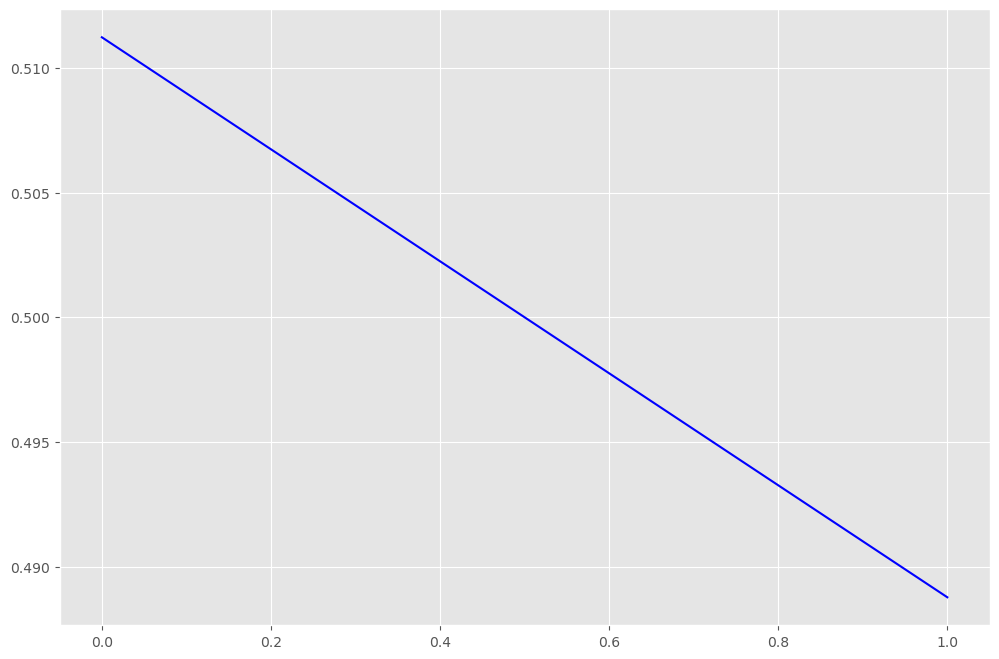

In [20]:
import matplotlib.pyplot as plt
plt.plot(list(range(2)), pca.explained_variance_ratio_, '-b')

In [21]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel = 'rbf', gamma = 0.04)

In [22]:
X_reduced = rbf_pca.fit_transform(X)

In [30]:
X_reduced[:,0]

array([-1.51500631e-01,  4.61578988e-01,  1.41022931e-01,  3.01476994e-01,
       -3.11618240e-01,  1.91251340e-01,  2.23351828e-01,  2.65116789e-01,
        3.93433289e-01, -2.05401637e-01, -6.91131918e-02, -3.25244637e-01,
        4.22832997e-01, -4.40843115e-02,  7.52932477e-02,  2.37604522e-01,
        1.24970101e-01, -4.85093142e-02,  2.80806868e-01, -3.68863902e-01,
        3.43802419e-01, -2.63824368e-01, -3.42150854e-01, -2.55179145e-01,
        7.96691228e-02,  4.49225923e-01, -1.73140837e-01,  2.31579089e-01,
       -2.79071216e-01,  1.20227730e-01, -1.64555920e-02,  1.20112428e-03,
        2.20465420e-01,  1.42366608e-01,  2.93395587e-01, -1.72901029e-01,
       -2.82151245e-02, -2.49941666e-01,  4.12013338e-01,  3.65659102e-02,
       -1.05293577e-01, -1.87063919e-02, -4.45715833e-01, -4.42507917e-02,
       -3.29807712e-01, -3.44534210e-02, -7.22981456e-03,  1.60298162e-01,
       -2.21755923e-01, -1.96952884e-01,  3.03224500e-01,  3.36575124e-01,
       -5.11974295e-02,  

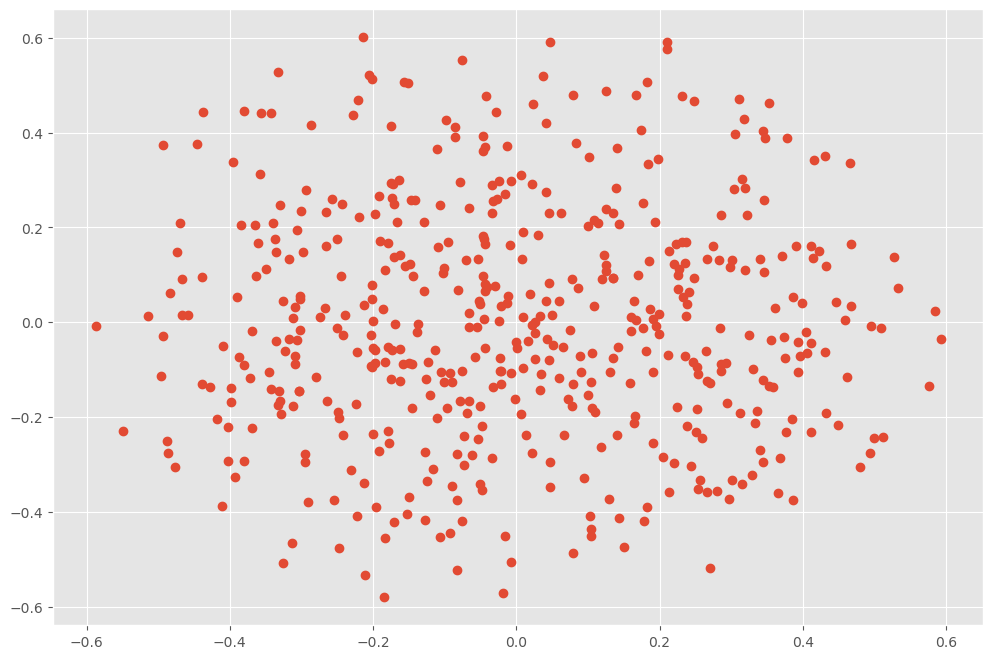

In [33]:
plt.plot(X_reduced[:,0], X_reduced[:,1], 'o')

In [50]:
X

array([[-1.89679174e+00,  1.11975078e+00],
       [ 1.71451643e+00,  1.03808600e+00],
       [-5.62544341e-01,  1.46267691e+00],
       [ 4.96487516e-01,  1.21729535e+00],
       [-8.21953630e-01, -7.24136470e-01],
       [ 7.99495525e-01,  2.84126815e-01],
       [ 2.00011673e-01,  1.08057184e+00],
       [ 8.91290264e-01,  5.91445407e-01],
       [ 1.41556787e+00,  8.45998620e-01],
       [-2.20033945e+00,  1.04654512e+00],
       [ 3.45985766e-01, -6.00050526e-01],
       [ 6.94490318e-01, -2.90033063e+00],
       [ 8.22883570e-01,  1.67907375e+00],
       [-2.42278588e-01,  1.29309498e-01],
       [ 2.69599969e-01,  2.15468786e-01],
       [ 1.25422235e+00,  1.00447222e-01],
       [-9.91784422e-01,  1.86814677e+00],
       [ 8.60362759e-01, -1.02529667e+00],
       [ 1.86144380e+00, -1.77106745e-01],
       [-3.81479667e-01, -1.59105210e+00],
       [-1.13071950e-01,  2.34064175e+00],
       [-2.32158702e-01, -1.06316251e+00],
       [-2.38884804e+00,  3.61234319e-01],
       [ 3.

In [52]:
rbf_pca.fit_inverse_transform()

TypeError: 'bool' object is not callable

In [36]:
rbf_pca.eigenvalues_

array([32.77207117, 30.25277281])

In [44]:
rbf_pca.eigenvectors_

array([[-2.64644271e-02,  9.16034967e-02],
       [ 8.06295221e-02, -2.11731152e-02],
       [ 2.46341620e-02,  6.68525239e-02],
       [ 5.26625921e-02,  2.39438206e-02],
       [-5.44340848e-02,  1.81828224e-03],
       [ 3.34081589e-02, -1.90123215e-02],
       [ 3.90155350e-02,  2.97993283e-02],
       [ 4.63111203e-02, -1.11393968e-02],
       [ 6.87256978e-02, -1.89704738e-02],
       [-3.58799604e-02,  9.48916258e-02],
       [-1.20728278e-02, -3.46930746e-02],
       [-5.68143706e-02, -9.21205339e-02],
       [ 7.38612965e-02,  2.71702026e-02],
       [-7.70073393e-03,  1.20636033e-02],
       [ 1.31523721e-02, -3.11280480e-03],
       [ 4.15052235e-02, -3.98450970e-02],
       [ 2.18300221e-02,  8.85004737e-02],
       [-8.47370207e-03, -6.41660766e-02],
       [ 4.90518940e-02, -6.45161966e-02],
       [-6.44338692e-02, -4.06694690e-02],
       [ 6.00560803e-02,  7.34766538e-02],
       [-4.60853575e-02, -3.00468380e-02],
       [-5.97675817e-02,  8.00690302e-02],
       [-4.

In [45]:
rbf_pca.X_transformed_fit_

AttributeError: 'KernelPCA' object has no attribute 'X_transformed_fit_'